In [1]:
# Food Delivery Time Prediction - End to End ML Project

"""
Project: Predict delivery time for food orders
Dataset: Kaggle Food Delivery Dataset (gauravmalik26)
Author: Ozurumba E Yadimma
"""


'\nProject: Predict delivery time for food orders\nDataset: Kaggle Food Delivery Dataset (gauravmalik26)\nAuthor: Ozurumba E Yadimma\n'

IMPORT NECESSARY LIBRARIES 


In [92]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


DATA LOADING AND INITIAL EXPLORATION

In [5]:
#Import data
train_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\work1\food_delivery\train.csv")
test_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\work1\food_delivery\test.csv")
print(f"\nTraining set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


Training set shape: (45593, 20)
Test set shape: (11399, 19)


In [6]:
#View first few rows of train_data along side data_frame summary 
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [7]:
#View data_frame summary for test data 
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  object 
 3   Delivery_person_Ratings      11399 non-null  object 
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  11399 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weatherconditions            11399 non-null  object 
 12  Road_traffic_density         11399 non-null  object 
 13  Vehicle_conditio

In [8]:
#Statistical summary of data
train_df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


EXPLORATORY DATA ANALYSIS

In [10]:
train_df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [11]:
train_df['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [12]:
# Converting time taken column to int
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].str.replace('(min) ', '').astype(int)
train_df['Time_taken(min)'].head()

0    24
1    33
2    26
3    21
4    30
Name: Time_taken(min), dtype: int32

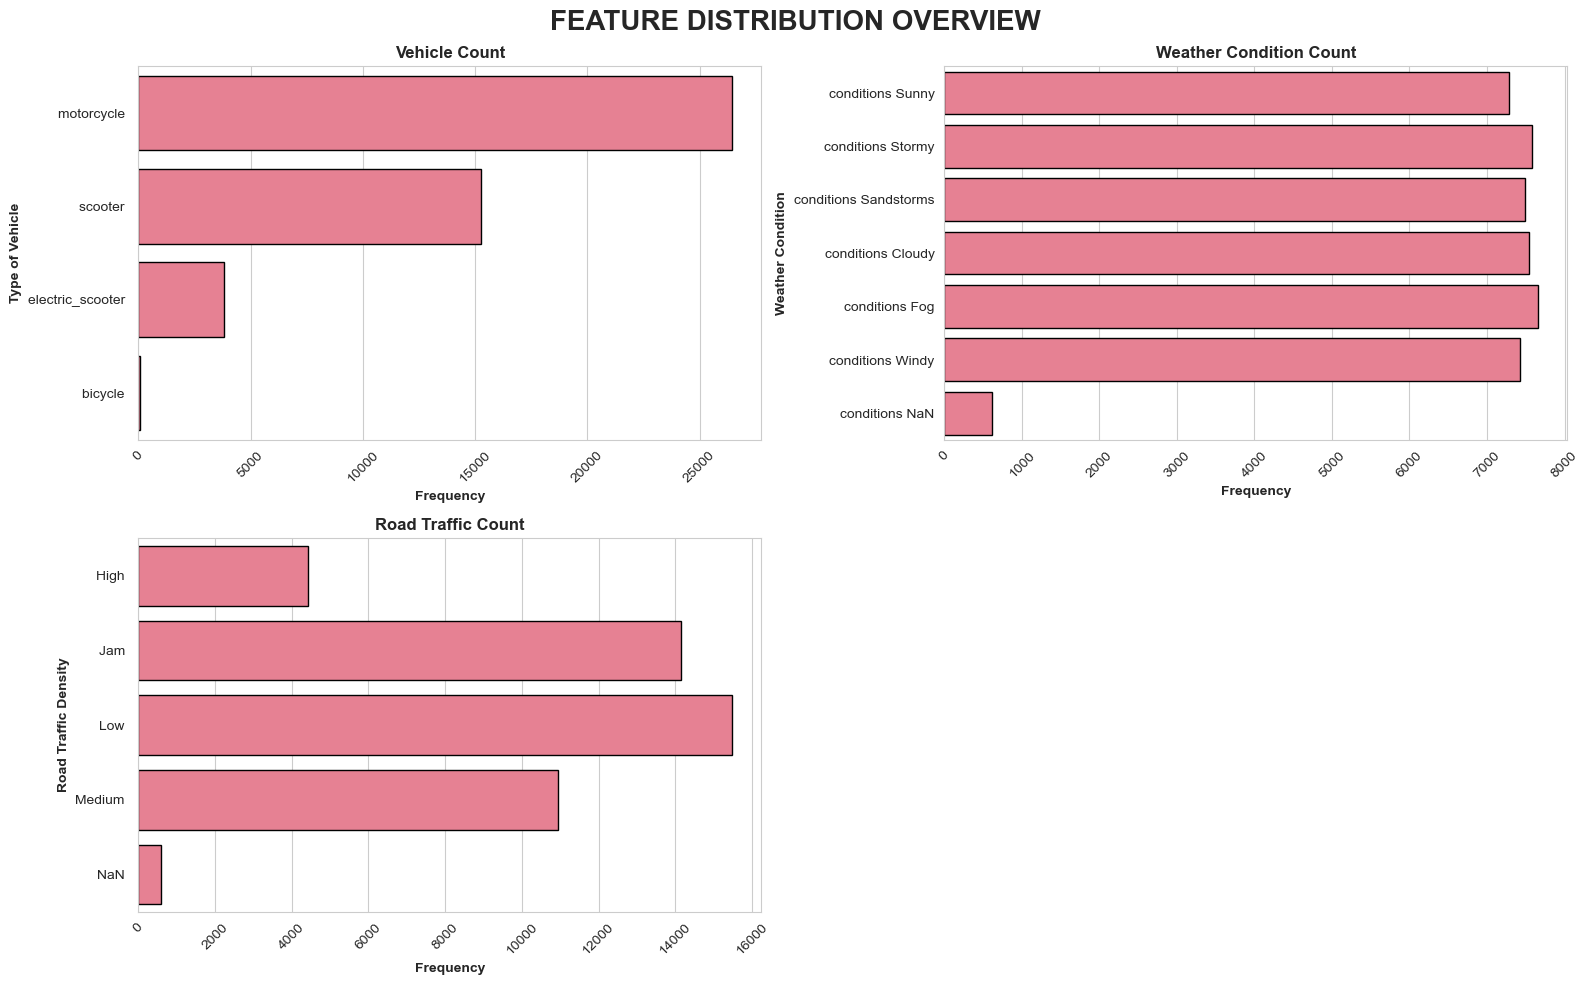

In [13]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle('FEATURE DISTRIBUTION OVERVIEW', fontsize=20, fontweight='bold', y=0.98)

plt.subplot(2, 2, 1)
sns.countplot(train_df['Type_of_vehicle'], edgecolor = 'black')
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Type of Vehicle', fontweight='bold')
plt.title('Vehicle Count', fontweight='bold')
plt.tick_params(axis='x', rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(train_df['Weatherconditions'], edgecolor = 'black')
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Weather Condition', fontweight='bold')
plt.title('Weather Condition Count', fontweight='bold')
plt.tick_params(axis='x', rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(train_df['Road_traffic_density'], edgecolor = 'black')
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Road Traffic Density', fontweight='bold')
plt.title('Road Traffic Count', fontweight='bold')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

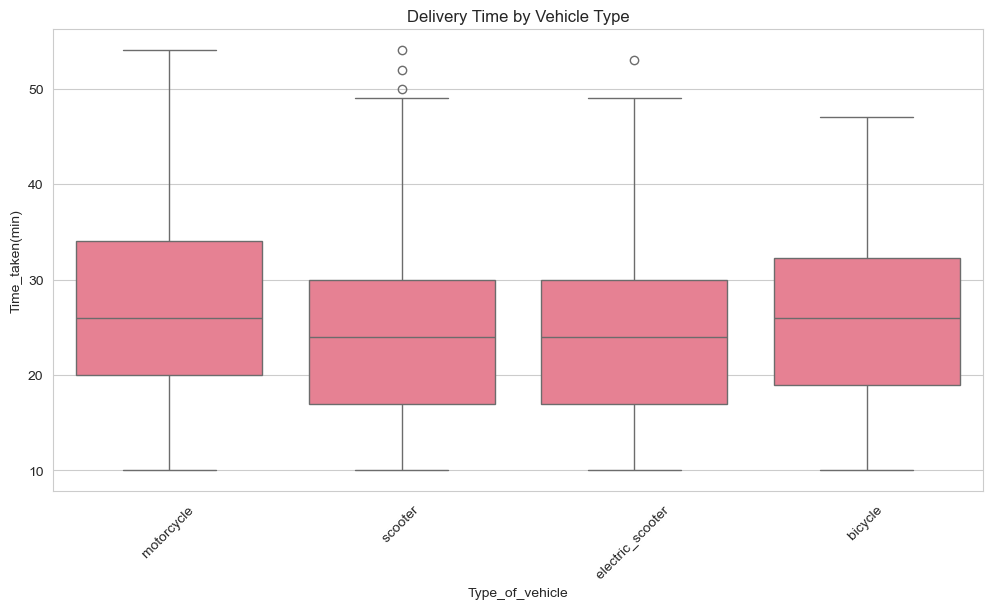

In [14]:
# Relationship between delivery time and vehicle type
sns.boxplot(data=train_df, x='Type_of_vehicle', y= 'Time_taken(min)')
plt.title('Delivery Time by Vehicle Type')
plt.xticks(rotation=45);

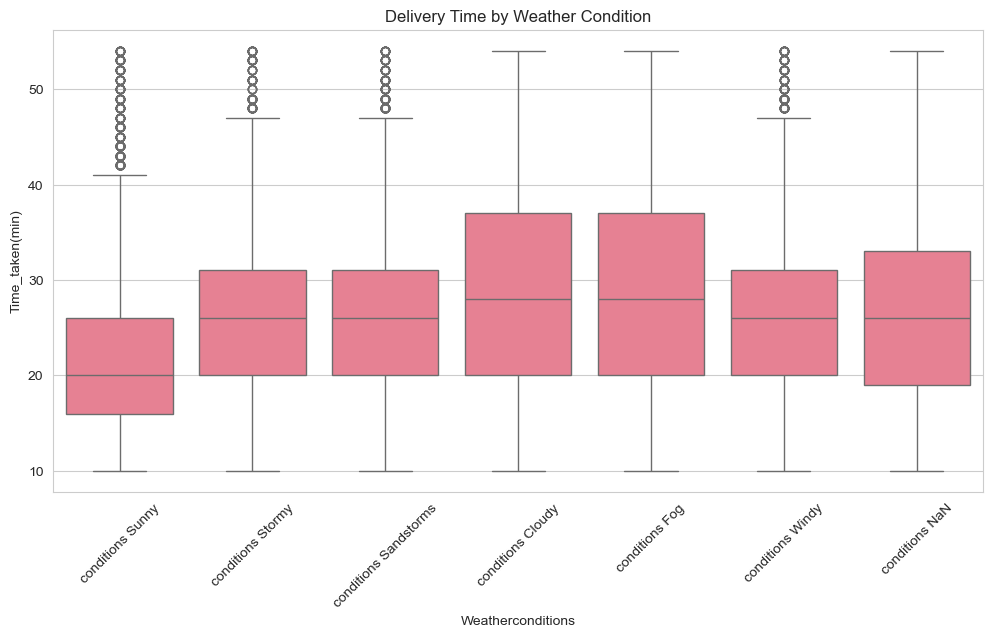

In [15]:
# Relationship between delivery time and weather condition
sns.boxplot(data=train_df, x='Weatherconditions', y= 'Time_taken(min)')
plt.title('Delivery Time by Weather Condition')
plt.xticks(rotation=45);

DATA CLEANING 

In [17]:
# Check for extreme outliers in delivery time
Q1 = train_df['Time_taken(min)'].quantile(0.25)
Q3 = train_df['Time_taken(min)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
outliers = train_df[(train_df['Time_taken(min)'] < lower_bound) | 
                       (train_df['Time_taken(min)'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")



Outlier bounds: [-0.50, 51.50]
Number of outliers: 270 (0.59%)


In [18]:
# Handle outliers by capping
train_df['Time_taken(min)'] = np.where(train_df['Time_taken(min)'] < lower_bound, lower_bound, train_df['Time_taken(min)'])
train_df['Time_taken(min)'] = np.where(train_df['Time_taken(min)'] > upper_bound, upper_bound, train_df['Time_taken(min)'])

In [19]:
# Check for extreme outliers in delivery time
Q1 = train_df['Time_taken(min)'].quantile(0.25)
Q3 = train_df['Time_taken(min)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
outliers = train_df[(train_df['Time_taken(min)'] < lower_bound) | 
                       (train_df['Time_taken(min)'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")


Outlier bounds: [-0.50, 51.50]
Number of outliers: 0 (0.00%)


In [20]:
# Drop NaN values from weather conditions columns
train_df = train_df[train_df['Weatherconditions'].str.contains('NaN') == False]
train_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0


In [21]:
# Standardize weather conditions
if 'Weatherconditions' in train_df.columns:
    print("\nUnique Weather Conditions (before cleaning):")
    print(train_df['Weatherconditions'].value_counts())


Unique Weather Conditions (before cleaning):
Weatherconditions
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
Name: count, dtype: int64


In [22]:
# Standardize weather conditions 2
train_df['Weatherconditions'] = train_df['Weatherconditions'].str.lower()
test_df['Weatherconditions'] = test_df['Weatherconditions'].str.lower()
print("\nUnique Weather Conditions (after cleaning):")
print(train_df['Weatherconditions'].value_counts())


Unique Weather Conditions (after cleaning):
Weatherconditions
conditions fog           7654
conditions stormy        7586
conditions cloudy        7536
conditions sandstorms    7495
conditions windy         7422
conditions sunny         7284
Name: count, dtype: int64


FEATURE ENGINEERING

In [24]:
# Geospatial features - Distance calculation
# Haversine function
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    Returns distance in kilometers
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    
    return c * r


In [25]:
# Calculate distance between restaurant and delivery location
if all(col in train_df.columns for col in ['Restaurant_latitude', 'Restaurant_longitude', 
                                             'Delivery_location_latitude', 'Delivery_location_longitude']):
    
    train_df['Delivery_Distance_km'] = haversine_distance(
        train_df['Restaurant_latitude'],
        train_df['Restaurant_longitude'],
        train_df['Delivery_location_latitude'],
        train_df['Delivery_location_longitude']
    )
    
    test_df['Delivery_Distance_km'] = haversine_distance(
        test_df['Restaurant_latitude'],
        test_df['Restaurant_longitude'],
        test_df['Delivery_location_latitude'],
        test_df['Delivery_location_longitude']
    )
    
    print("✓ Calculated Delivery_Distance_km using Haversine formula")
    print(f"  Distance range: {train_df['Delivery_Distance_km'].min():.2f} - {train_df['Delivery_Distance_km'].max():.2f} km")
    
    # Create distance categories
    train_df['Distance_Category'] = pd.cut(train_df['Delivery_Distance_km'],
                                            bins=[0, 2, 5, 10, 50],
                                            labels=['Very_Short', 'Short', 'Medium', 'Long'])
    
    test_df['Distance_Category'] = pd.cut(test_df['Delivery_Distance_km'],
                                           bins=[0, 2, 5, 10, 50],
                                           labels=['Very_Short', 'Short', 'Medium', 'Long'])

✓ Calculated Delivery_Distance_km using Haversine formula
  Distance range: 1.47 - 19688.00 km


In [26]:
# Function to extract datetime features
def extract_datetime_features(df):
    """Extract useful features from date and time columns"""
    
    # Convert Order_Date to datetime if it exists
    if 'Order_Date' in df.columns:
        df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
        
        # Extract date components
        df['Order_Day'] = df['Order_Date'].dt.day
        df['Order_Month'] = df['Order_Date'].dt.month
        df['Order_Year'] = df['Order_Date'].dt.year
        df['Order_DayOfWeek'] = df['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6
        df['Order_WeekOfYear'] = df['Order_Date'].dt.isocalendar().week
        
        # Create is_weekend feature
        df['Is_Weekend'] = (df['Order_DayOfWeek'] >= 5).astype(int)
        
        print("✓ Extracted date features: Day, Month, Year, DayOfWeek, WeekOfYear, Is_Weekend")
    
    # Convert Time_Orderd to datetime and extract hour
    if 'Time_Orderd' in df.columns:
        df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], errors='coerce')
        df['Order_Hour'] = df['Time_Orderd'].dt.hour
        df['Order_Minute'] = df['Time_Orderd'].dt.minute
        
        # Create time of day categories
        df['Time_of_Day'] = pd.cut(df['Order_Hour'], 
                                     bins=[0, 6, 12, 17, 21, 24],
                                     labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Late_Night'],
                                     include_lowest=True)
        
        # Peak hours (lunch: 11-14, dinner: 18-21)
        df['Is_Peak_Hour'] = ((df['Order_Hour'] >= 11) & (df['Order_Hour'] <= 14) | 
                              (df['Order_Hour'] >= 18) & (df['Order_Hour'] <= 21)).astype(int)
        
        print("✓ Extracted time features: Hour, Minute, Time_of_Day, Is_Peak_Hour")
    
    # Convert Time_Order_picked to datetime and calculate preparation time
    if 'Time_Order_picked' in df.columns:
        df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], errors='coerce')
        
        # Calculate preparation time (time between order and pickup)
        if 'Time_Orderd' in df.columns:
            df['Preparation_Time'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60
            df['Preparation_Time'] = df['Preparation_Time'].abs()  # Handle negative values
            print("✓ Calculated Preparation_Time (minutes)")
    
    return df

# Apply datetime feature extraction
train_df = extract_datetime_features(train_df)
test_df = extract_datetime_features(test_df)

✓ Extracted date features: Day, Month, Year, DayOfWeek, WeekOfYear, Is_Weekend
✓ Extracted time features: Hour, Minute, Time_of_Day, Is_Peak_Hour
✓ Calculated Preparation_Time (minutes)
✓ Extracted date features: Day, Month, Year, DayOfWeek, WeekOfYear, Is_Weekend
✓ Extracted time features: Hour, Minute, Time_of_Day, Is_Peak_Hour
✓ Calculated Preparation_Time (minutes)


In [27]:
# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns found: {categorical_cols}")


Categorical columns found: ['ID', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']


In [28]:
train_df['Road_traffic_density'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object)

In [29]:
# Encoding categorical variables
# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns found: {categorical_cols}")

# One-Hot Encoding for ordinal features (using one-hot instead of label encoding)
ordinal_features = ['Road_traffic_density', 'Weather_conditions']

for col in ordinal_features:
    if col in train_df.columns:
        # Create dummy variables
        train_dummies = pd.get_dummies(train_df[col], prefix=col, drop_first=True)
        test_dummies = pd.get_dummies(test_df[col], prefix=col, drop_first=True)
        
        # Align columns (in case test set has different categories)
        train_dummies, test_dummies = train_dummies.align(test_dummies, join='left', axis=1, fill_value=0)
        
        # Add to dataframes
        train_df = pd.concat([train_df, train_dummies], axis=1)
        test_df = pd.concat([test_df, test_dummies], axis=1)
        
        print(f"✓ One-hot encoded: {col} ({len(train_dummies.columns)} new columns)")




Categorical columns found: ['ID', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']
✓ One-hot encoded: Road_traffic_density (3 new columns)


In [30]:
# One-Hot Encoding for nominal features (no natural order)
nominal_features = ['Type_of_order', 'Type_of_vehicle', 'City', 'Festival', 
                    'Time_of_Day', 'Distance_Category']

for col in nominal_features:
    if col in train_df.columns:
        # Convert to string type first to handle any issues
        train_df[col] = train_df[col].astype(str)
        test_df[col] = test_df[col].astype(str)
        # Create dummy variables
        train_dummies = pd.get_dummies(train_df[col], prefix=col, drop_first=True)
        test_dummies = pd.get_dummies(test_df[col], prefix=col, drop_first=True)
        
        # Align columns (in case test set has different categories)
        train_dummies, test_dummies = train_dummies.align(test_dummies, join='left', axis=1, fill_value=0)
        
        # Add to dataframes
        train_df = pd.concat([train_df, train_dummies], axis=1)
        test_df = pd.concat([test_df, test_dummies], axis=1)
        
        print(f"✓ One-hot encoded: {col} ({len(train_dummies.columns)} new columns)")

✓ One-hot encoded: Type_of_order (3 new columns)
✓ One-hot encoded: Type_of_vehicle (2 new columns)
✓ One-hot encoded: City (3 new columns)
✓ One-hot encoded: Festival (2 new columns)
✓ One-hot encoded: Time_of_Day (5 new columns)
✓ One-hot encoded: Distance_Category (4 new columns)


In [31]:
# Identify numerical features to scale
numerical_features = ['Delivery_person_Age', 'Delivery_person_Ratings', 
                     'Delivery_Distance_km', 'Vehicle_condition', 'multiple_deliveries',
                     'Order_Hour', 'Preparation_Time', 'Distance_Traffic_Interaction',
                     'Person_Efficiency', 'Vehicle_Load', 'Weather_Traffic_Score',
                     'Expected_Time', 'Delivery_Complexity']

# Filter features that actually exist in the dataframe
features_to_scale = [col for col in numerical_features if col in train_df.columns]

print(f"\nScaling {len(features_to_scale)} numerical features...")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])


Scaling 7 numerical features...


In [72]:
# Drop original datetime and categorical columns (we've created features from them)
columns_to_drop = ['Order_Date', 'Time_Orderd', 'Time_Order_picked',
                   'Restaurant_latitude', 'Restaurant_longitude',
                   'Delivery_location_latitude', 'Delivery_location_longitude']

# Add original categorical columns that have been encoded
columns_to_drop.extend([col for col in categorical_cols if col in train_df.columns])

# Also drop any categorical features we created (we've one-hot encoded them)
for col in ['Time_of_Day', 'Distance_Category']:
    if col in train_df.columns:
        columns_to_drop.append(col)

# Drop columns that exist
columns_to_drop = [col for col in columns_to_drop if col in train_df.columns]

train_df = train_df.drop(columns=columns_to_drop, errors='ignore')
test_df = test_df.drop(columns=columns_to_drop, errors='ignore')

# Safety check: Identify any remaining object/categorical columns
remaining_categorical = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(remaining_categorical) > 0:
    print(f"\n Warning: Found {len(remaining_categorical)} remaining categorical columns:")
    print(remaining_categorical)
    print("Converting them to numeric or dropping...")
    
    # Try to convert to numeric, drop if not possible
    for col in remaining_categorical:
        try:
            train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
            test_df[col] = pd.to_numeric(test_df[col], errors='coerce')
            print(f"  ✓ Converted {col} to numeric")
        except:
            train_df = train_df.drop(columns=[col], errors='ignore')
            test_df = test_df.drop(columns=[col], errors='ignore')
            print(f"  ✓ Dropped {col}")
else:
    print("✓ No categorical columns remaining - all features are numeric!")

# Check for missing values
print("\n" + "="*80)
print("CHECKING FOR MISSING VALUES")
print("="*80)

train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

train_missing_cols = train_missing[train_missing > 0]
test_missing_cols = test_missing[test_missing > 0]

if len(train_missing_cols) > 0:
    print(f"\n⚠️  Found missing values in TRAINING set:")
    for col, count in train_missing_cols.items():
        pct = (count / len(train_df)) * 100
        print(f"  {col}: {count} ({pct:.2f}%)")
else:
    print("\n✓ No missing values in training set!")

if len(test_missing_cols) > 0:
    print(f"\n⚠️  Found missing values in TEST set:")
    for col, count in test_missing_cols.items():
        pct = (count / len(test_df)) * 100
        print(f"  {col}: {count} ({pct:.2f}%)")
else:
    print("✓ No missing values in test set!")

# Handle missing values if any exist
if len(train_missing_cols) > 0 or len(test_missing_cols) > 0:
    print("\n" + "="*80)
    print("FILLING MISSING VALUES")
    print("="*80)
    
    # Get all columns with missing values
    all_missing_cols = set(train_missing_cols.index.tolist() + test_missing_cols.index.tolist())
    
    for col in all_missing_cols:
        if col in train_df.columns:
            # Use median for numerical columns
            median_value = train_df[col].median()
            
            # If median is NaN (all values are NaN), use 0
            if pd.isna(median_value):
                median_value = 0
            
            train_df[col].fillna(median_value, inplace=True)
            test_df[col].fillna(median_value, inplace=True)
            
            print(f"  ✓ Filled {col} with median: {median_value:.4f}")
    
    print("\n✓ All missing values handled!")

# Final verification
print("\n" + "="*80)
print("FINAL VERIFICATION")
print("="*80)

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"Total missing values in training: {train_df.isnull().sum().sum()}")
print(f"Total missing values in test: {test_df.isnull().sum().sum()}")
print(f"Data types in training set:\n{train_df.dtypes.value_counts()}")

# Check for infinite values
train_inf = np.isinf(train_df.select_dtypes(include=[np.number])).sum().sum()
test_inf = np.isinf(test_df.select_dtypes(include=[np.number])).sum().sum()

if train_inf > 0 or test_inf > 0:
    print(f"\n⚠️  Found infinite values - Training: {train_inf}, Test: {test_inf}")
    print("Replacing infinite values with 0...")
    train_df.replace([np.inf, -np.inf], 0, inplace=True)
    test_df.replace([np.inf, -np.inf], 0, inplace=True)
    print("✓ Infinite values replaced!")
else:
    print("✓ No infinite values found!")

print("\n✓ Data is clean and ready for modeling!")

✓ No categorical columns remaining - all features are numeric!

CHECKING FOR MISSING VALUES

⚠️  Found missing values in TRAINING set:
  Order_Hour: 1115 (2.48%)
  Order_Minute: 1115 (2.48%)
  Preparation_Time: 1115 (2.48%)

⚠️  Found missing values in TEST set:
  Order_Hour: 444 (3.90%)
  Order_Minute: 444 (3.90%)
  Preparation_Time: 444 (3.90%)

FILLING MISSING VALUES
  ✓ Filled Order_Minute with median: 30.0000
  ✓ Filled Preparation_Time with median: -0.1387
  ✓ Filled Order_Hour with median: 0.3271

✓ All missing values handled!

FINAL VERIFICATION
Training set shape: (44977, 35)
Test set shape: (11399, 34)
Total missing values in training: 0
Total missing values in test: 0
Data types in training set:
bool       22
float64     6
int32       6
UInt32      1
Name: count, dtype: int64
✓ No infinite values found!

✓ Data is clean and ready for modeling!


In [74]:
# Separate features and target
if 'Time_taken(min)' in train_df.columns:
    X_train = train_df.drop('Time_taken(min)', axis=1)
    y_train = train_df['Time_taken(min)']
else:
    X_train = train_df
    y_train = None

X_test = test_df

print(f"\nFinal feature set:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
if y_train is not None:
    print(f"y_train shape: {y_train.shape}")

print(f"\nTotal features created: {X_train.shape[1]}")
print("\nFeature list:")
print(X_train.columns.tolist())



Final feature set:
X_train shape: (44977, 34)
X_test shape: (11399, 34)
y_train shape: (44977,)

Total features created: 34

Feature list:
['Vehicle_condition', 'Delivery_Distance_km', 'Order_Day', 'Order_Month', 'Order_Year', 'Order_DayOfWeek', 'Order_WeekOfYear', 'Is_Weekend', 'Order_Hour', 'Order_Minute', 'Is_Peak_Hour', 'Preparation_Time', 'Road_traffic_density_Jam ', 'Road_traffic_density_Low ', 'Road_traffic_density_Medium ', 'Type_of_order_Drinks ', 'Type_of_order_Meal ', 'Type_of_order_Snack ', 'Type_of_vehicle_motorcycle ', 'Type_of_vehicle_scooter ', 'City_NaN ', 'City_Semi-Urban ', 'City_Urban ', 'Festival_No ', 'Festival_Yes ', 'Time_of_Day_Evening', 'Time_of_Day_Late_Night', 'Time_of_Day_Morning', 'Time_of_Day_Night', 'Time_of_Day_nan', 'Distance_Category_Medium', 'Distance_Category_Short', 'Distance_Category_Very_Short', 'Distance_Category_nan']


MODEL BUILDING AND EVALUATION


In [76]:
# Split training data into train and validation sets (80-20 split)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_split.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (35981, 34)
Validation set: (8996, 34)
Test set: (11399, 34)


In [78]:
# evaluation metrics function
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Evaluate model performance on training and validation sets
    """
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics for training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Print results
    print(f"\n{model_name} Performance:")
    print("-" * 60)
    print(f"{'Metric':<20} {'Training':<15} {'Validation':<15}")
    print("-" * 60)
    print(f"{'RMSE':<20} {train_rmse:<15.4f} {val_rmse:<15.4f}")
    print(f"{'MAE':<20} {train_mae:<15.4f} {val_mae:<15.4f}")
    print(f"{'R² Score':<20} {train_r2:<15.4f} {val_r2:<15.4f}")
    print("-" * 60)
    
    # Check for overfitting
    if train_r2 - val_r2 > 0.1:
        print("Warning: Possible overfitting detected (train R² >> validation R²)")
    
    return {
        'model_name': model_name,
        'train_rmse': train_rmse,
        'train_mae': train_mae,
        'train_r2': train_r2,
        'val_rmse': val_rmse,
        'val_mae': val_mae,
        'val_r2': val_r2,
        'predictions': y_val_pred
    }

print("✓ Evaluation function defined")


✓ Evaluation function defined


Training Linear Regression...
✓ Training completed!

Linear Regression Performance:
------------------------------------------------------------
Metric               Training        Validation     
------------------------------------------------------------
RMSE                 7.2325          7.2061         
MAE                  5.8385          5.8228         
R² Score             0.4015          0.4111         
------------------------------------------------------------

Top 10 Most Important Features (by absolute coefficient):
                         Feature  Coefficient
24                 Festival_Yes     23.065023
21              City_Semi-Urban     12.852796
23                  Festival_No     10.460291
13     Road_traffic_density_Low      7.601785
30      Distance_Category_Medium     5.577913
31       Distance_Category_Short     5.399876
32  Distance_Category_Very_Short     5.075319
20                     City_NaN      3.415645
14  Road_traffic_density_Medium      3.288667
22

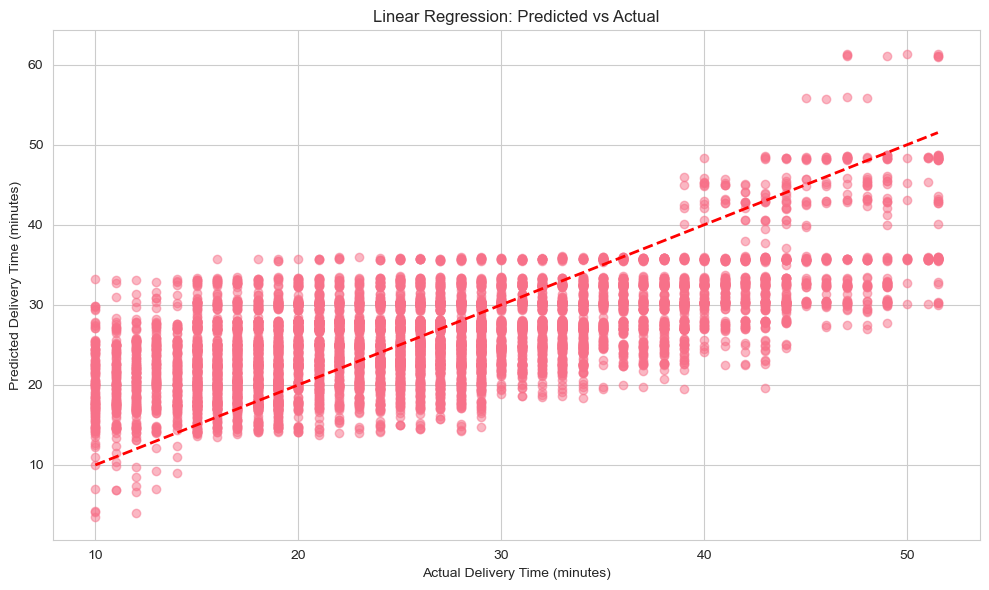

In [80]:
# LINEAR REGRESSOR 
# Initialize and train Linear Regression
lr_model = LinearRegression()

print("Training Linear Regression...")
lr_model.fit(X_train_split, y_train_split)
print("✓ Training completed!")

# Evaluate model
lr_results = evaluate_model(lr_model, X_train_split, y_train_split, 
                            X_val, y_val, "Linear Regression")

# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': np.abs(lr_model.coef_)
}).sort_values('Coefficient', ascending=False).head(10)

print("\nTop 10 Most Important Features (by absolute coefficient):")
print(feature_importance_lr)

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_val, lr_results['predictions'], alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Delivery Time (minutes)')
plt.ylabel('Predicted Delivery Time (minutes)')
plt.title('Linear Regression: Predicted vs Actual')
plt.tight_layout()
plt.show()

Training Decision Tree Regressor...
Parameters: max_depth=10, min_samples_split=20, min_samples_leaf=10
✓ Training completed!

Decision Tree Performance:
------------------------------------------------------------
Metric               Training        Validation     
------------------------------------------------------------
RMSE                 6.9694          7.1813         
MAE                  5.5767          5.7573         
R² Score             0.4442          0.4151         
------------------------------------------------------------

Top 10 Most Important Features:
                         Feature  Importance
13     Road_traffic_density_Low     0.331358
1           Delivery_Distance_km    0.233960
0              Vehicle_condition    0.201328
23                  Festival_No     0.046307
24                 Festival_Yes     0.041041
22                   City_Urban     0.036722
14  Road_traffic_density_Medium     0.035968
12     Road_traffic_density_Jam     0.018559
21           

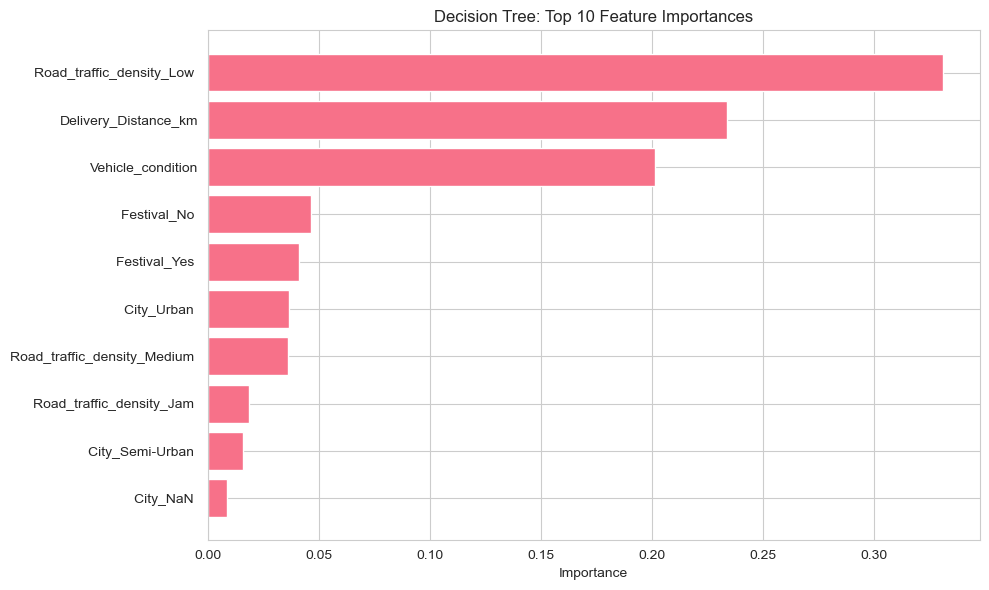

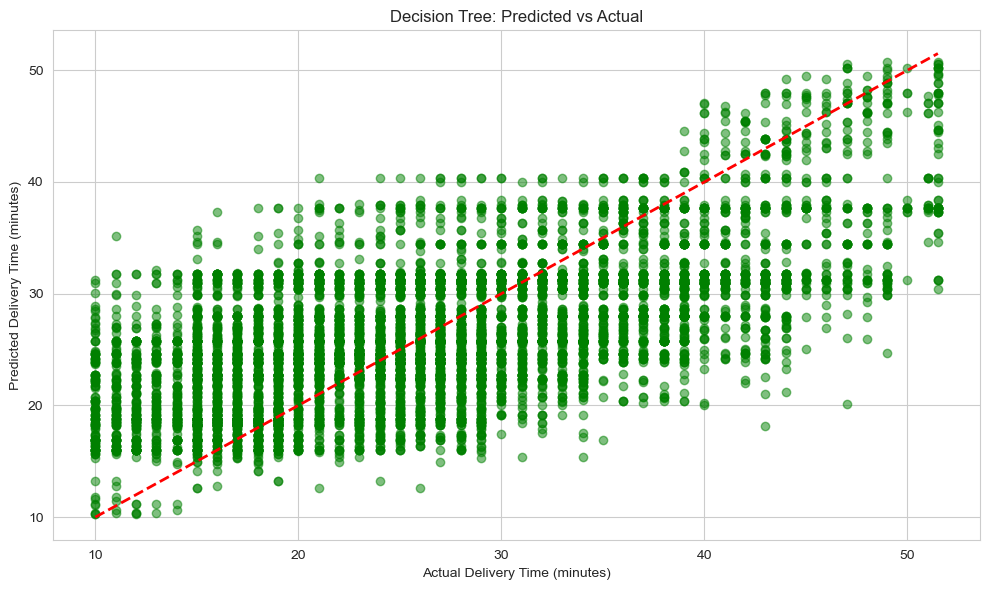

In [82]:
# TRAINING DECISIONTREE REGRESSOR
# Initialize Decision Tree with some constraints to prevent overfitting
dt_model = DecisionTreeRegressor(
    max_depth=10,           # Limit tree depth
    min_samples_split=20,   # Minimum samples to split a node
    min_samples_leaf=10,    # Minimum samples in a leaf
    random_state=42
)

print("Training Decision Tree Regressor...")
print(f"Parameters: max_depth=10, min_samples_split=20, min_samples_leaf=10")
dt_model.fit(X_train_split, y_train_split)
print("✓ Training completed!")

# Evaluate model
dt_results = evaluate_model(dt_model, X_train_split, y_train_split, 
                           X_val, y_val, "Decision Tree")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print("\nTop 10 Most Important Features:")
print(feature_importance_dt)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'])
plt.xlabel('Importance')
plt.title('Decision Tree: Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_val, dt_results['predictions'], alpha=0.5, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Delivery Time (minutes)')
plt.ylabel('Predicted Delivery Time (minutes)')
plt.title('Decision Tree: Predicted vs Actual')
plt.tight_layout()
plt.show()

Training Random Forest Regressor...
Parameters: n_estimators=100, max_depth=15, min_samples_split=20
✓ Training completed!

Random Forest Performance:
------------------------------------------------------------
Metric               Training        Validation     
------------------------------------------------------------
RMSE                 6.4161          7.1460         
MAE                  5.1293          5.7383         
R² Score             0.5290          0.4208         
------------------------------------------------------------

Top 10 Most Important Features:
                         Feature  Importance
13     Road_traffic_density_Low     0.271906
1           Delivery_Distance_km    0.253698
0              Vehicle_condition    0.170526
24                 Festival_Yes     0.054795
22                   City_Urban     0.031115
9                   Order_Minute    0.029697
14  Road_traffic_density_Medium     0.029602
2                      Order_Day    0.023887
23              

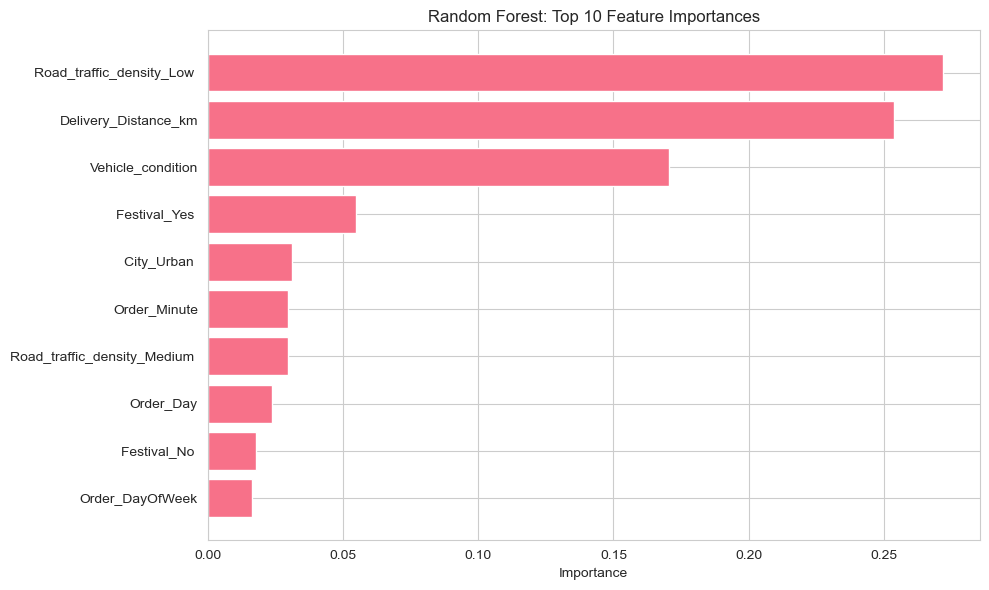

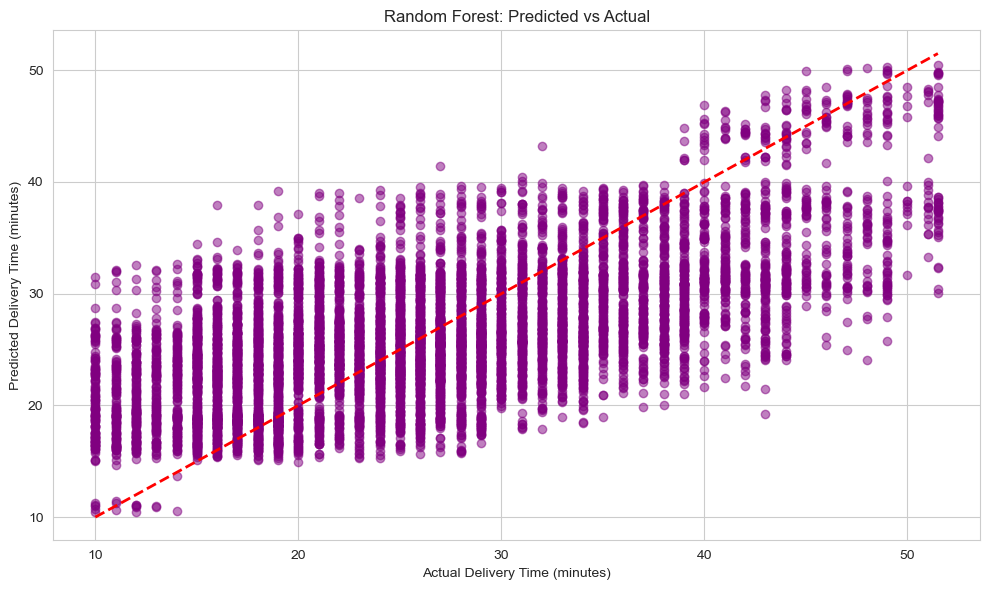

In [84]:
# TRAINING RANDOM FOREST REGRESSOR
# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,       # Number of trees
    max_depth=15,           # Limit tree depth
    min_samples_split=20,   # Minimum samples to split
    min_samples_leaf=10,    # Minimum samples in leaf
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

print("Training Random Forest Regressor...")
print(f"Parameters: n_estimators=100, max_depth=15, min_samples_split=20")
rf_model.fit(X_train_split, y_train_split)
print("✓ Training completed!")

# Evaluate model
rf_results = evaluate_model(rf_model, X_train_split, y_train_split, 
                           X_val, y_val, "Random Forest")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print("\nTop 10 Most Important Features:")
print(feature_importance_rf)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest: Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_val, rf_results['predictions'], alpha=0.5, color='purple')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Actual Delivery Time (minutes)')
plt.ylabel('Predicted Delivery Time (minutes)')
plt.title('Random Forest: Predicted vs Actual')
plt.tight_layout()
plt.show()



Model Performance Comparison:
            Model  Train RMSE  Val RMSE  Train MAE  Val MAE  Train R²   Val R²
Linear Regression    7.232510  7.206090   5.838539 5.822804  0.401481 0.411056
    Decision Tree    6.969357  7.181313   5.576709 5.757266  0.444243 0.415099
    Random Forest    6.416131  7.145998   5.129313 5.738258  0.528972 0.420837

 Best Model (by Validation R²): Random Forest


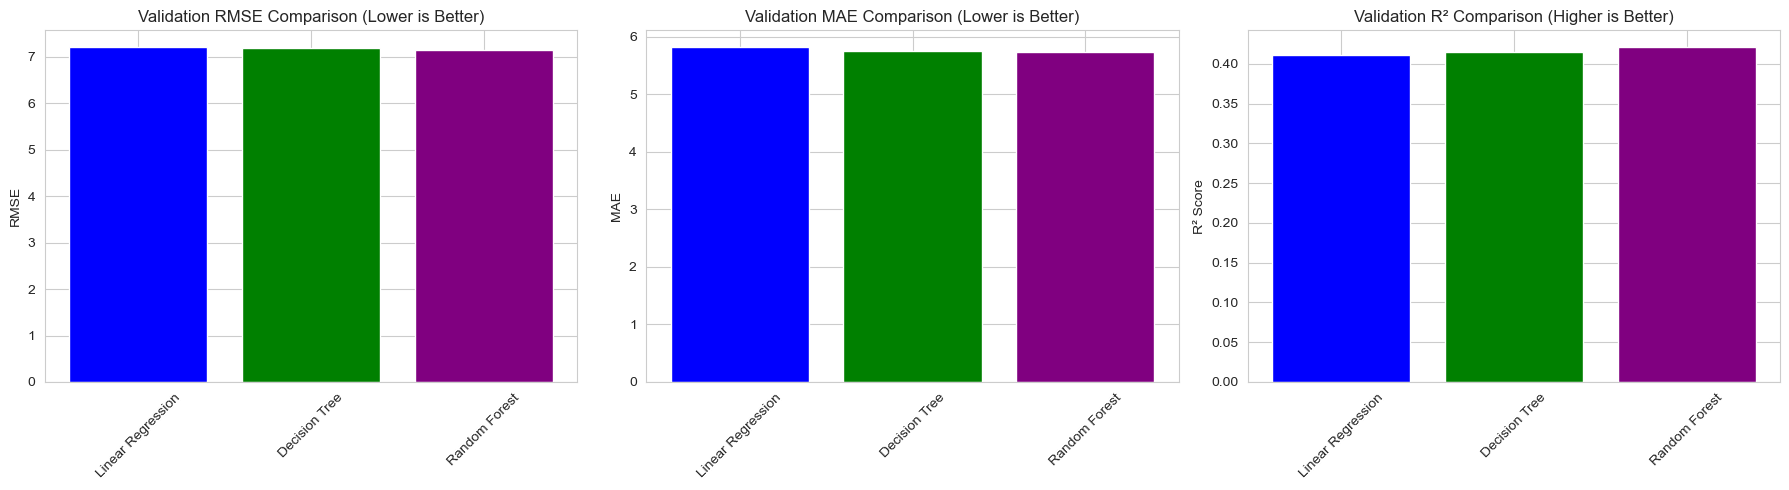

In [88]:
# MODEL COMPARISON
# Create comparison dataframe
comparison_df = pd.DataFrame([
    {
        'Model': lr_results['model_name'],
        'Train RMSE': lr_results['train_rmse'],
        'Val RMSE': lr_results['val_rmse'],
        'Train MAE': lr_results['train_mae'],
        'Val MAE': lr_results['val_mae'],
        'Train R²': lr_results['train_r2'],
        'Val R²': lr_results['val_r2']
    },
    {
        'Model': dt_results['model_name'],
        'Train RMSE': dt_results['train_rmse'],
        'Val RMSE': dt_results['val_rmse'],
        'Train MAE': dt_results['train_mae'],
        'Val MAE': dt_results['val_mae'],
        'Train R²': dt_results['train_r2'],
        'Val R²': dt_results['val_r2']
    },
    {
        'Model': rf_results['model_name'],
        'Train RMSE': rf_results['train_rmse'],
        'Val RMSE': rf_results['val_rmse'],
        'Train MAE': rf_results['train_mae'],
        'Val MAE': rf_results['val_mae'],
        'Train R²': rf_results['train_r2'],
        'Val R²': rf_results['val_r2']
    }
])

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))

# Find best model based on validation R²
best_model_idx = comparison_df['Val R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\n Best Model (by Validation R²): {best_model_name}")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE comparison
axes[0].bar(comparison_df['Model'], comparison_df['Val RMSE'], color=['blue', 'green', 'purple'])
axes[0].set_ylabel('RMSE')
axes[0].set_title('Validation RMSE Comparison (Lower is Better)')
axes[0].tick_params(axis='x', rotation=45)

# MAE comparison
axes[1].bar(comparison_df['Model'], comparison_df['Val MAE'], color=['blue', 'green', 'purple'])
axes[1].set_ylabel('MAE')
axes[1].set_title('Validation MAE Comparison (Lower is Better)')
axes[1].tick_params(axis='x', rotation=45)

# R² comparison
axes[2].bar(comparison_df['Model'], comparison_df['Val R²'], color=['blue', 'green', 'purple'])
axes[2].set_ylabel('R² Score')
axes[2].set_title('Validation R² Comparison (Higher is Better)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [94]:
# HYPERPARAMETER TUNING
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_split, y_train_split)

print("\n✓ Grid Search completed!")
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")

# Train final model with best parameters
best_rf_model = grid_search.best_estimator_

# Evaluate tuned model
print("\nEvaluating tuned Random Forest model:")
tuned_rf_results = evaluate_model(best_rf_model, X_train_split, y_train_split, 
                                  X_val, y_val, "Random Forest (Tuned)")


Fitting 3 folds for each of 81 candidates, totalling 243 fits

✓ Grid Search completed!

Best parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 30, 'n_estimators': 150}
Best cross-validation R² score: 0.4142

Evaluating tuned Random Forest model:

Random Forest (Tuned) Performance:
------------------------------------------------------------
Metric               Training        Validation     
------------------------------------------------------------
RMSE                 6.9072          7.0631         
MAE                  5.5352          5.6755         
R² Score             0.4541          0.4342         
------------------------------------------------------------


FINAL MODEL TRAINING

In [97]:
# Select best model (tuned Random Forest)
final_model = best_rf_model

# Train on full training data
print("Training final model on complete training set...")
final_model.fit(X_train, y_train)
print("✓ Final model trained!")

# Calculate metrics on full training data
y_train_final_pred = final_model.predict(X_train)
final_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_final_pred))
final_train_mae = mean_absolute_error(y_train, y_train_final_pred)
final_train_r2 = r2_score(y_train, y_train_final_pred)

print(f"\nFinal Model Performance on Full Training Data:")
print(f"RMSE: {final_train_rmse:.4f}")
print(f"MAE: {final_train_mae:.4f}")
print(f"R² Score: {final_train_r2:.4f}")

Training final model on complete training set...
✓ Final model trained!

Final Model Performance on Full Training Data:
RMSE: 6.9255
MAE: 5.5495
R² Score: 0.4522


MAKING PREDICTIONS ON TEST DATA

In [102]:
# Make predictions on test set
test_predictions = final_model.predict(X_test)

print(f"\nPrediction statistics:")
print(f"Mean predicted time: {test_predictions.mean():.2f} minutes")
print(f"Std predicted time: {test_predictions.std():.2f} minutes")
print(f"Min predicted time: {test_predictions.min():.2f} minutes")
print(f"Max predicted time: {test_predictions.max():.2f} minutes")

# Save predictions
predictions_df = pd.DataFrame({
    'Predicted_Delivery_Time': test_predictions
})
predictions_df.to_csv('test_predictions.csv', index=False)
print("\n✓ Predictions saved to 'test_predictions.csv'")


Prediction statistics:
Mean predicted time: 26.23 minutes
Std predicted time: 6.11 minutes
Min predicted time: 10.78 minutes
Max predicted time: 50.41 minutes

✓ Predictions saved to 'test_predictions.csv'


SAVING MODELS

In [107]:
import pickle

# Save all models
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('final_tuned_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

print(" All models saved successfully!")
print("  - linear_regression_model.pkl")
print("  - decision_tree_model.pkl")
print("  - random_forest_model.pkl")
print("  - final_tuned_model.pkl")

 All models saved successfully!
  - linear_regression_model.pkl
  - decision_tree_model.pkl
  - random_forest_model.pkl
  - final_tuned_model.pkl
